# 載入所需套件

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from datetime import datetime
%matplotlib inline

style.use('seaborn')
#設定字體和解決圖像中文顯示問題
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus']=False

# 定義抓取融資融劵餘額變化和增減資料函數

In [2]:
def security_lend_borrow_crawler():
    #爬取近30日融資融劵餘額資料
    url='https://histock.tw/stock/three.aspx?m=mg'
    df=pd.read_html(url)[0]

    #將民國年改成西元年
    date=df['日期'].copy()
    year=datetime.now().year
    for i in range(len(df)):
        date.iloc[i]='{}/{}'.format(year,date.iloc[i])
    df.set_index(pd.to_datetime(date,format='%Y/%m/%d'),inplace=True)
    df=df.iloc[:,1:]
    df.sort_index(inplace=True)
    df.index=df.index.format(formatter=lambda x:x.strftime('%Y-%m-%d'))
    
    return df

# 定義繪製資融劵餘額變化和增減圖函數

In [3]:
def plot_security_lend_borrow(df,plot_type='融劵'):
    if plot_type=='融資':
        #將融資增加正值資料挑選出來，用來區分柱狀圖顏色
        capital=df['融資增加(億)']>0
        fig,axes=plt.subplots(2,figsize=(15,15),sharex=True)
        axes[0].plot(df['融資餘額(億)'],label='融資餘額變化(單位:億)',color='r')
        axes[0].set_xticklabels(df.index,fontsize=9,rotation=90)
        axes[0].set_title('近30個交易日 融資餘額變化圖 (單位:億)',fontsize=20)
        axes[0].tick_params(axis='x',labelbottom=True)
        axes[0].legend(loc='upper left',fontsize=13)

        axes[1].bar(df.index,df['融資增加(億)'],color=capital.map({True:'r',False:'g'}),edgecolor='k',alpha=0.8,width=0.5)
        axes[1].axhline(y=0,color='k',linestyle='-')
        axes[1].set_title('近30個交易日 融資餘額增減圖 (單位:億)',fontsize=20)
        axes[1].set_xticklabels(df.index,fontsize=9,rotation=90)
        axes[1].tick_params(axis='x',labelbottom=True)

        plt.tight_layout(pad=3)
        plt.savefig('近30個交易日融資餘額變化和增減圖.png')
        plt.show()
    else:
        #將融劵增加正值資料挑選出來，用來區分柱狀圖顏色
        security=df['融券增加(張)']>0
        fig,axes=plt.subplots(2,figsize=(15,15),sharex=True)
        axes[0].plot(df['融券餘額(張)'],label='融劵餘額變化(單位:張)',color='g')
        axes[0].set_xticklabels(df.index,fontsize=9,rotation=90)
        axes[0].set_title('近30個交易日  融劵餘額變化圖 (單位:張)',fontsize=20)
        axes[0].tick_params(axis='x',labelbottom=True)
        axes[0].legend(loc='lower left',fontsize=13)

        axes[1].bar(df.index,df['融券增加(張)'],color=security.map({True:'r',False:'g'}),edgecolor='k',alpha=0.8,width=0.5)
        axes[1].axhline(y=0,color='k',linestyle='-')
        axes[1].set_title('近30個交易日 融券餘額增減圖 (單位:張)',fontsize=20)
        axes[1].set_xticklabels(df.index,fontsize=9,rotation=90)
        axes[1].tick_params(axis='x',labelbottom=True)

        plt.tight_layout(pad=3)
        plt.savefig('近30個交易日融劵餘額變化和增減圖.png')
        plt.show()

# 抓取融資融劵餘額變化和增減資料

In [4]:
df=security_lend_borrow_crawler()
df.head()

,融資餘額(億),融資增加(億),融券餘額(張),融券增加(張),價格,比例,成交量(億)
2020-05-21,1143.8,10.1,881466,-2832,11008.31,0.92%,1693.9
2020-05-22,1146.6,2.8,876283,-5182,10811.15,-1.79%,1777.3
2020-05-25,1158.5,11.9,867958,-8244,10871.18,0.56%,1463.5
2020-05-26,1158.4,-0.1,871497,3539,10997.21,1.16%,1811.5
2020-05-27,1156.9,-1.5,869277,-2220,11014.66,0.16%,1567.1


# 將近30個交易日融資融劵餘額變化和增減資料匯出成Excel檔

In [5]:
df.to_excel('近30個交易日融資融劵餘額變化和增減資料.xlsx')

# 繪製近30個交易日融資餘額變化和增減圖 (單位:億)

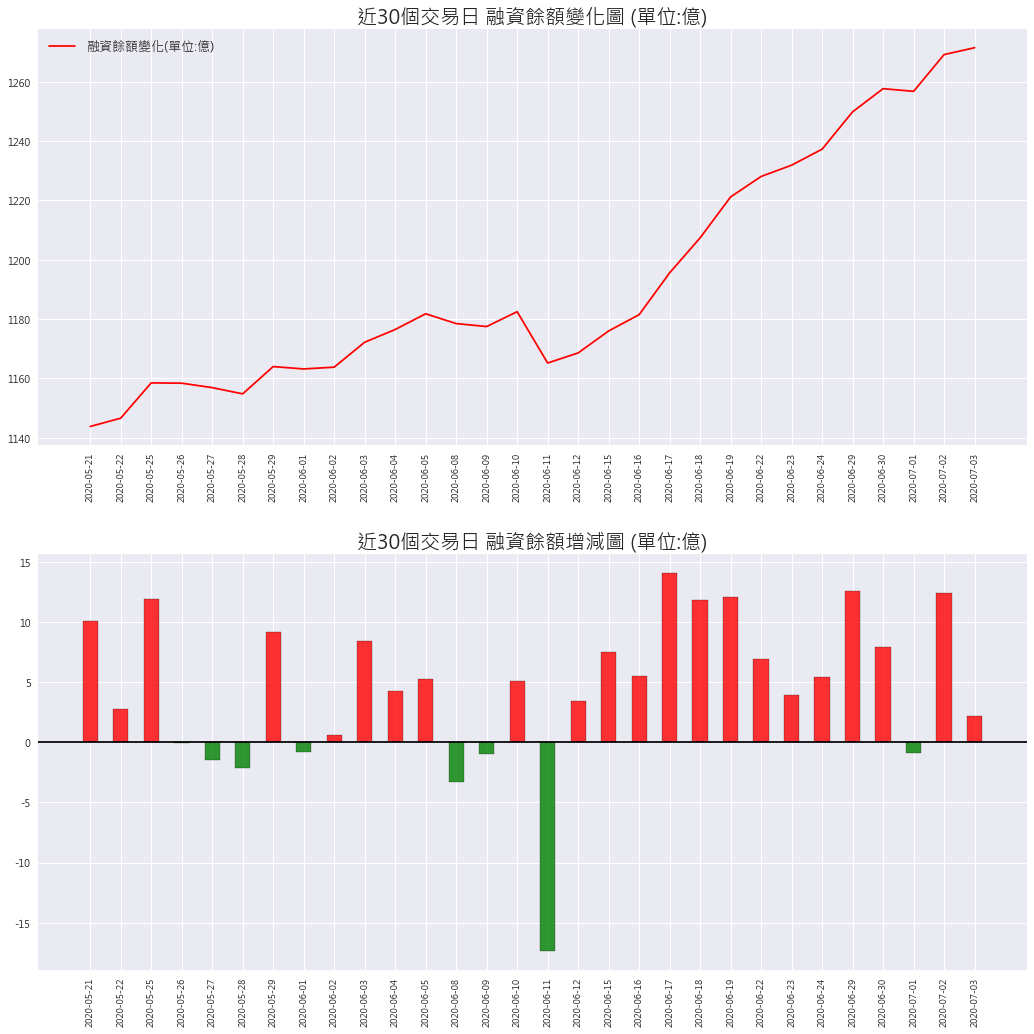

In [6]:
plot_security_lend_borrow(df,'融資')

# 繪製近30個交易日融劵餘額變化和增減圖 (單位:張)

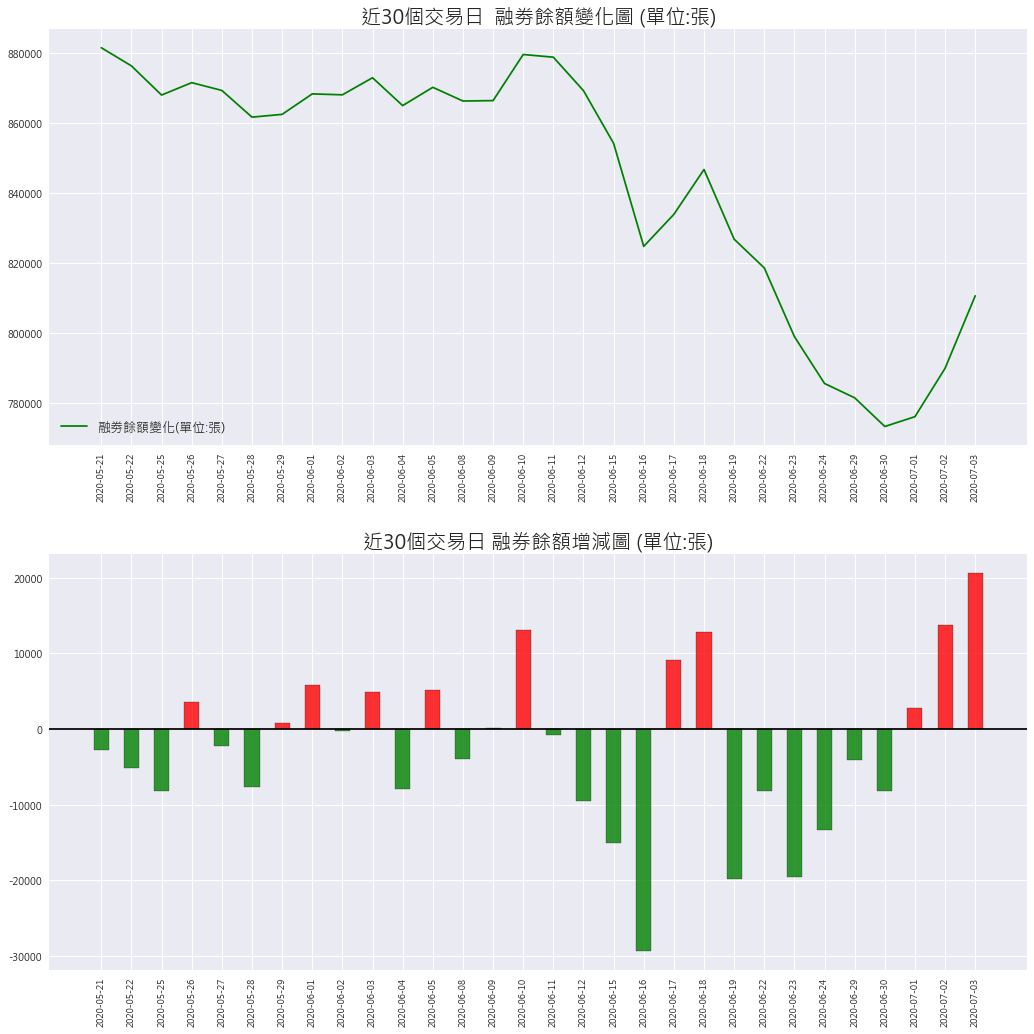

In [7]:
plot_security_lend_borrow(df,'融劵')